In [61]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [62]:
# Load stock price data (replace 'AAPL.csv' with your dataset)
data = pd.read_csv('C:\\Users\\hp\\Downloads\\AAPL.csv')
data = data['Close'].values.reshape(-1, 1)

In [63]:
# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [64]:
# Create sequences and labels for training
sequence_length = 10  # Adjust this based on your needs
sequences = []
labels = []
for i in range(len(data_scaled) - sequence_length):
    sequences.append(data_scaled[i:i + sequence_length])
    labels.append(data_scaled[i + sequence_length])

X = np.array(sequences)
y = np.array(labels)

In [65]:
# Split data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [66]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [67]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
7/7 [==============================] - 5s 13ms/step - loss: 0.1642
Epoch 2/10
7/7 [==============================] - 0s 13ms/step - loss: 0.1288
Epoch 3/10
7/7 [==============================] - 0s 12ms/step - loss: 0.0949
Epoch 4/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0576
Epoch 5/10
7/7 [==============================] - 0s 12ms/step - loss: 0.0236
Epoch 6/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0135
Epoch 7/10
7/7 [==============================] - 0s 13ms/step - loss: 0.0115
Epoch 8/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0099
Epoch 9/10
7/7 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 10/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0060


In [68]:
# Make predictions
predictions = model.predict(X_test)


2/2 [==============================] - 1s 8ms/step


In [69]:
# Inverse transform predictions to original scale
predicted_prices = scaler.inverse_transform(predictions)
# You might need to adjust the ranges or data depending on your code
data_for_plot = data[train_size:train_size+len(predicted_prices)]


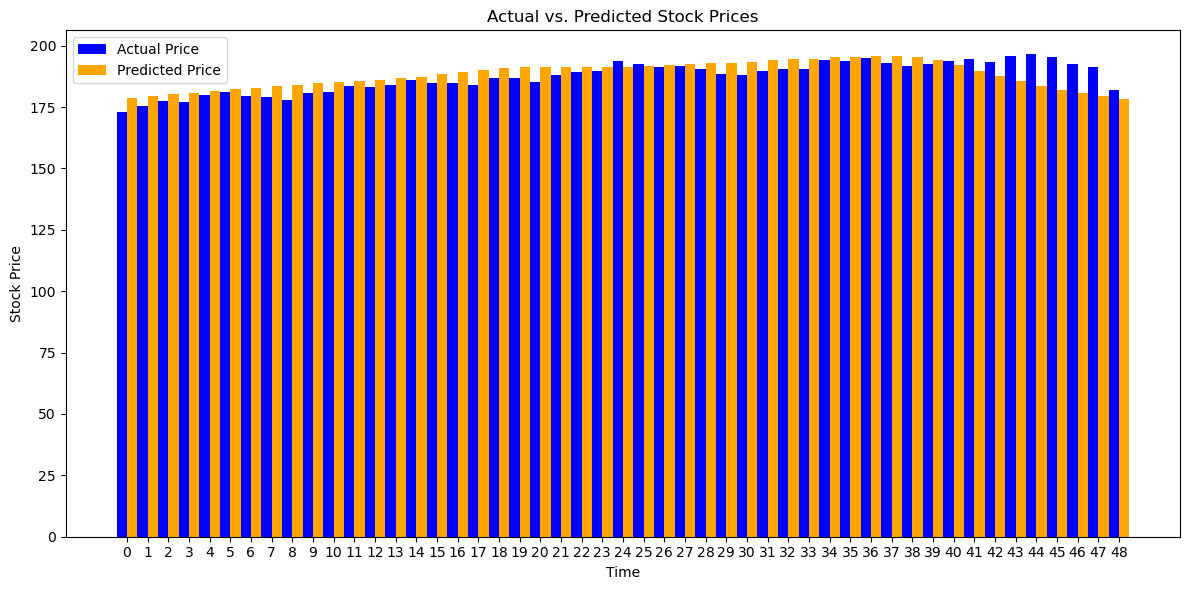

In [70]:
# Plot the actual and predicted prices in a bar graph
plt.figure(figsize=(12, 6))
bar_width = 0.5 # Adjust this for the width of the bars
index = np.arange(len(predicted_prices))  # Create x-axis positions for bars

plt.bar(index, data_for_plot.flatten(), width=bar_width, color='blue', label='Actual Price')
plt.bar(index + bar_width, predicted_prices.flatten(), width=bar_width, color='orange', label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.xticks(index + bar_width / 2, np.arange(len(predicted_prices)))  # Set x-axis ticks
plt.tight_layout()  # Adjust layout
plt.show()